In [2]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate as intpol
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [3]:
def load_barriers(sysname, whichds):
    """Load the predicted barriers."""
    basedir = f"/scratch/users/zilins/6.proj_ges_imi/3.gnn/model_pred"
    calc = numpy.load(f"{basedir}/{sysname}_{whichds}.npy")
    pred = numpy.load(f"{basedir}/{sysname}_{whichds}_pred.npy")
    return calc, pred

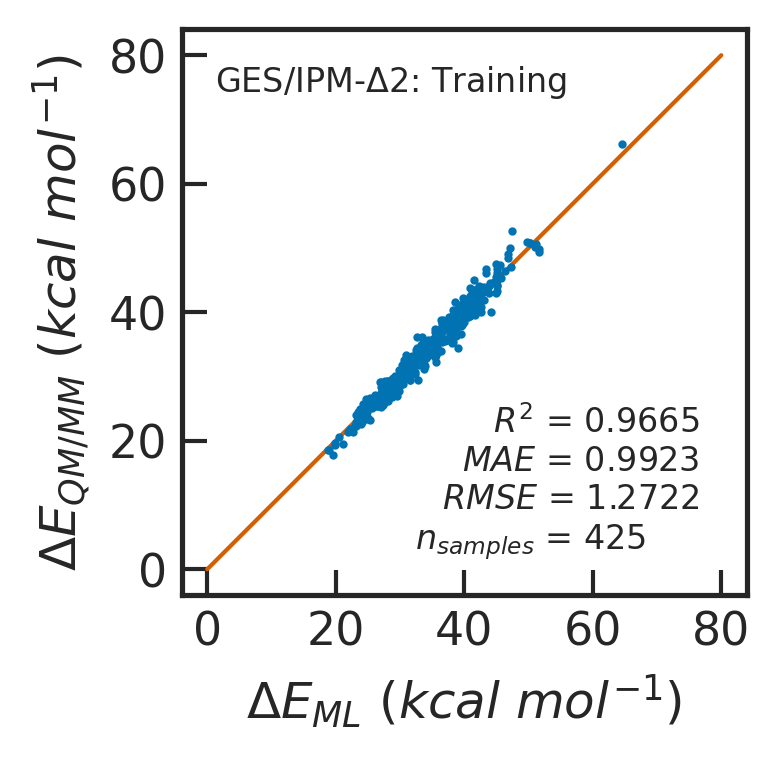

In [25]:
fig, ax,  = plt.subplots(figsize=(2.75, 2.75), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=.1/1.875, right=1.8/1.875, top=1.8/1.875, bottom=.1/1.875)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=20.0))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=20.0))
ax.tick_params(which='major', direction='in', length=6, width=1)

ax.set_xlabel(r'$\Delta E_{ML}$'+r' $(kcal$ $mol^{-1})$')
ax.set_ylabel(r'$\Delta E_{QM/MM}$'+r' $(kcal$ $mol^{-1})$')
ax.tick_params(which='major')

# legend labels:
sysname = 'd2'
whichds = 'train'

# load pathway data ================================================================
calc, pred = load_barriers(sysname, whichds)

# red line
mx =  80. # math.ceil( max(numpy.max(calc), numpy.max(pred), ) / 20.) * 20.
mn =   0. # math.floor(min(numpy.min(calc), numpy.min(pred), ) / 20.) * 20.
ax.plot(numpy.linspace( mx, mn, 2, ), numpy.linspace(mx, mn, 2), 
        c=sns.color_palette('colorblind')[3],  label='Fitting target', lw=1, zorder=1)

# scatters
ax.scatter(pred, calc, s=1, color=sns.color_palette('colorblind')[0], zorder=2)

# raw string of metrics
rstr_r2 = r'$R^2$'
rstr_mae = r'$MAE$'
rstr_rmse = r'$RMSE$'
rstr_nsamp = r'$n_{samples}$'
# metrics
r2   = numpy.corrcoef(calc, pred)[0, 1]**2
mae  = numpy.sum(numpy.abs(pred-calc))/calc.shape[0]
rmse = (numpy.sum((pred-calc)**2)/calc.shape[0]) ** 0.5
n    = calc.shape[0]

# display metrics on figure
ax.text(0.94, 0.06, 
        f'{rstr_r2: >10} = {r2: <8.4f}\n{rstr_mae: >10} = {mae: <8.4f}\n{rstr_rmse: >10} = {rmse: <8.4f}\n{rstr_nsamp: >10} = {n: <8}  ', 
        ha='right', va='bottom', transform=ax.transAxes, fontsize=8)

# label of system
syslbl = r"GES/IPM-$\Delta$1: " if sysname == 'd1'    else r"GES/IPM-$\Delta$2: " if sysname == 'd2'    else "wrong syslbl"
syslbl += "Training"            if whichds == 'train' else "Validation"           if whichds == 'valid' else "wrong syslbl"
ax.text(0.06, 0.94, syslbl, ha='left', va='top', transform=ax.transAxes, fontsize=8)

plt.tight_layout()
ax.set_aspect(1.)   
fig.savefig(f'{sysname}.{whichds}_barrier.png')